In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('/home/jupyter/HumpbackWhaleIdentification/data')
path.ls()

[PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/train.csv'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/test'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/train'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/sample_submission.csv'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/models'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/labels.csv')]

In [3]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/w_fb8e059/872d7a6f4.jpg,w_fb8e059
1,train/w_fb8e059/c96430b67.jpg,w_fb8e059
2,train/w_c85ff1e/3c8c68129.jpg,w_c85ff1e
3,train/w_c85ff1e/7828ee757.jpg,w_c85ff1e
4,train/w_c85ff1e/f88abffab.jpg,w_c85ff1e


In [4]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.3, test='test', ds_tfms=tfms, size=56)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:487: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
w_836e895, w_1ab568f, w_7a320a3, w_036dbd0, w_0dfb4f6...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [5]:
len(data.classes)

4220

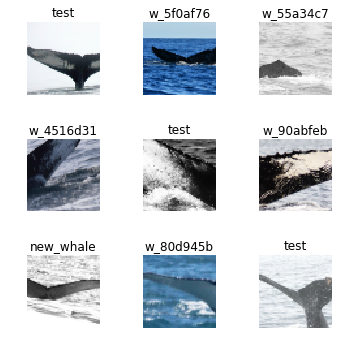

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [14]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,5.091970,4.419485,0.334219


In [8]:
preds,y = learn.get_preds()
preds

tensor([[2.5883e-01, 2.9860e-01, 1.7166e-05,  ..., 4.0610e-05, 3.7714e-05,
         2.2386e-05],
        [3.8737e-01, 2.1899e-01, 1.8130e-05,  ..., 3.3218e-05, 2.4487e-05,
         3.1538e-05],
        [3.2969e-01, 2.8167e-01, 2.0817e-05,  ..., 2.8696e-05, 3.9532e-05,
         2.4571e-05],
        ...,
        [1.1542e-01, 2.2253e-01, 3.5247e-05,  ..., 4.5292e-05, 5.5049e-05,
         4.2443e-05],
        [5.4699e-01, 2.4648e-01, 5.9944e-06,  ..., 1.6232e-05, 1.0498e-05,
         8.9223e-06],
        [1.3334e-01, 1.7939e-01, 4.5888e-05,  ..., 5.1526e-05, 6.5936e-05,
         6.0163e-05]])

In [24]:
preds.shape
validation_predictions = np.argmax(preds, axis=1)
ind = np.argpartition(preds, -5, axis=1)[-5:]

In [25]:
ind.shape
validation_predictions.shape

torch.Size([9030])

In [10]:
validation_predictions.shape

torch.Size([9030])

In [11]:
int(validation_predictions[1])

0

In [12]:
for pred in validation_predictions:
    print(data.classes[int(validation_predictions[1])])

new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale
new_whale


In [13]:
data.classes

['new_whale',
 'test',
 'w_0003639',
 'w_0027efa',
 'w_00289b1',
 'w_0032a46',
 'w_003bae6',
 'w_00656c0',
 'w_0066399',
 'w_007fefa',
 'w_00904a7',
 'w_009c9c5',
 'w_00a41ba',
 'w_00b3dc2',
 'w_00d50c9',
 'w_00d5466',
 'w_00d5e98',
 'w_00f340d',
 'w_010f858',
 'w_0118bab',
 'w_012678c',
 'w_0135f5f',
 'w_0140c92',
 'w_015a4bf',
 'w_016f0ea',
 'w_0182687',
 'w_0189b6d',
 'w_01a1d88',
 'w_01cb0c4',
 'w_01cbbbd',
 'w_01d790e',
 'w_01e1b97',
 'w_01e1fe0',
 'w_01f14e1',
 'w_01fc429',
 'w_02156b0',
 'w_022b708',
 'w_022d2f5',
 'w_02469a1',
 'w_02545ea',
 'w_025911c',
 'w_0277a07',
 'w_0292e15',
 'w_02aa597',
 'w_02c7e9d',
 'w_02d138d',
 'w_02d5c46',
 'w_02e8199',
 'w_02ff6d6',
 'w_0301302',
 'w_030ac9b',
 'w_030c8b0',
 'w_030e2cf',
 'w_03193e5',
 'w_031e1a3',
 'w_0323574',
 'w_03270e3',
 'w_0350bf4',
 'w_03670aa',
 'w_0369a5c',
 'w_036bc54',
 'w_037b23f',
 'w_038dfc0',
 'w_03ad89c',
 'w_03e3e5e',
 'w_04003e9',
 'w_042b547',
 'w_04713fd',
 'w_04738c8',
 'w_048bc73',
 'w_049ae2e',
 'w_04acf95